In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
water_df = pd.read_csv("data.csv")

In [3]:
print(water_df.shape)

(2011, 11)


In [4]:
water_df.drop("Unnamed: 0", axis = 1, inplace=True)
water_df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

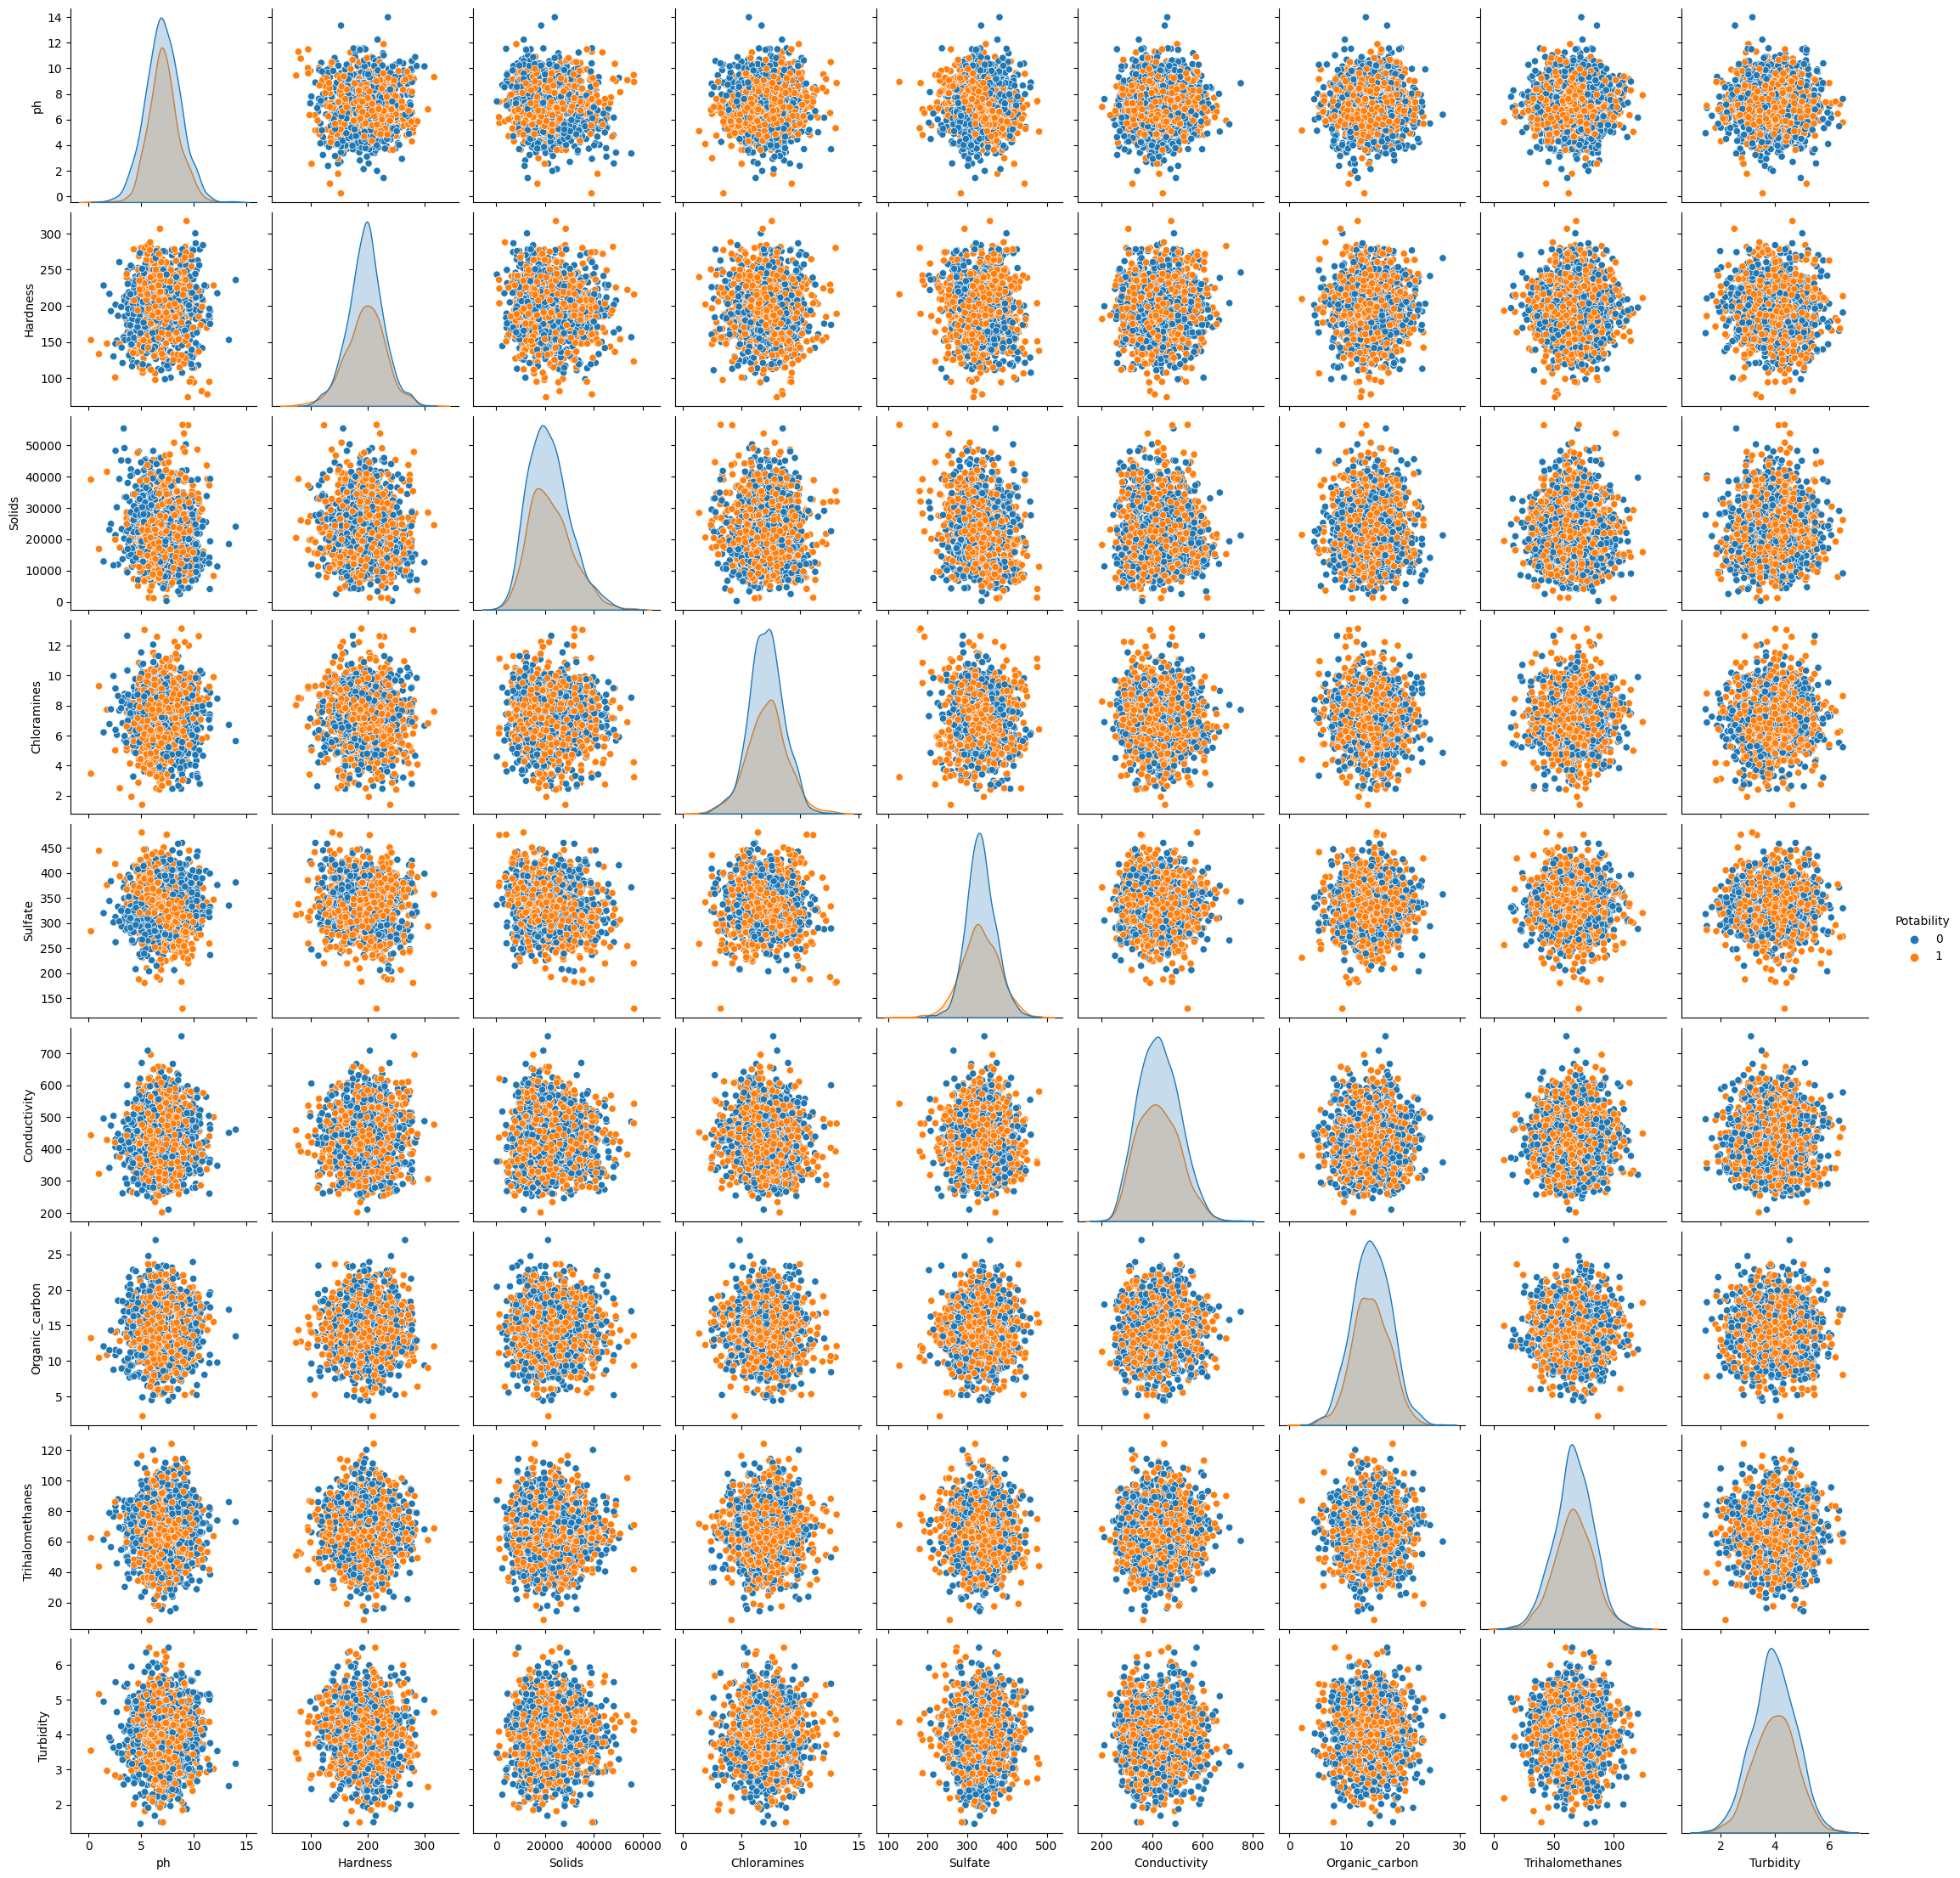

In [5]:
sns.pairplot(water_df, hue = 'Potability')

In [6]:
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


## Experiment Tracking by MLFlow Autolog

In [9]:
import mlflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

mlflow.autolog()

X = water_df[["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]]
y = water_df["Potability"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

scaler = StandardScaler()
X_train_rescaled = pd.DataFrame(scaler.fit_transform(X_train), 
                                    columns = X_train.columns, 
                                    index = X_train.index)

X_test_rescaled = pd.DataFrame(scaler.transform(X_test), 
                                   columns = X_test.columns, 
                                   index = X_test.index)

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_rescaled, y_train.values.ravel())

y_test_pred = knn_classifier.predict(X_test_rescaled)
acc = metrics.accuracy_score(y_test, y_test_pred)

2023/05/07 20:28:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2023/05/07 20:28:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2023/05/07 20:28:36 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2229418caca04fb3856f77e306309eb8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


## Training KNN Classifier with Hyperparameter Tuning

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
# Enabling automatic MLflow logging for scikit-learn runs
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run():
    tuned_parameters = [{'n_neighbors':[i for i in range(1, 51)], 'p':[1, 2]}]

    clf = GridSearchCV(
        estimator=KNeighborsClassifier(), 
        param_grid=tuned_parameters, 
        scoring='accuracy',
        cv=5,
        return_train_score=True,
        verbose=1
    )
    clf.fit(X_train, y_train)
    
    # Disabling autologging
    mlflow.sklearn.autolog(disable=True)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
